11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


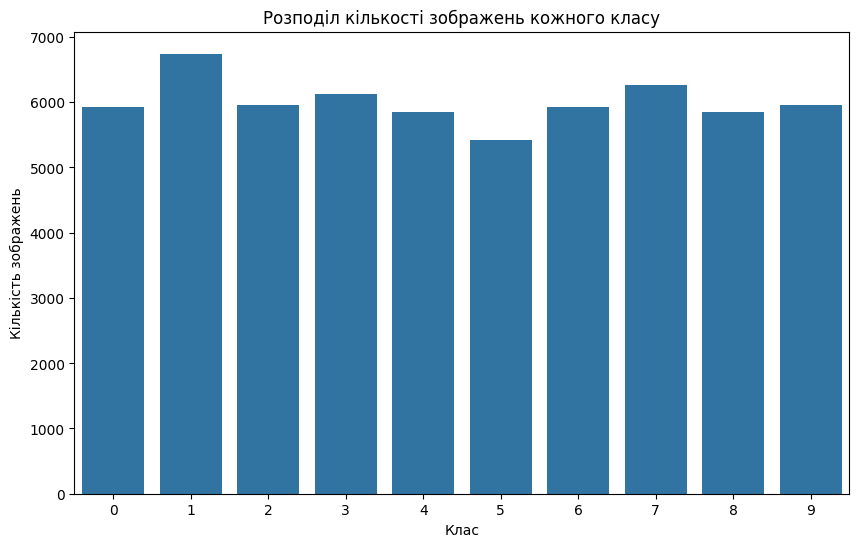

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

# === Блок 1: Завантаження та попередня обробка даних ===

# Завантаження датасету MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Візуалізація кількості зображень кожного класу
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title("Розподіл кількості зображень кожного класу")
plt.xlabel("Клас")
plt.ylabel("Кількість зображень")
plt.show()

x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))

# Нормалізація даних
x_data = x_data / 255.0
x_data = x_data.reshape((-1, 28, 28, 1))  # Додавання каналу для CNN



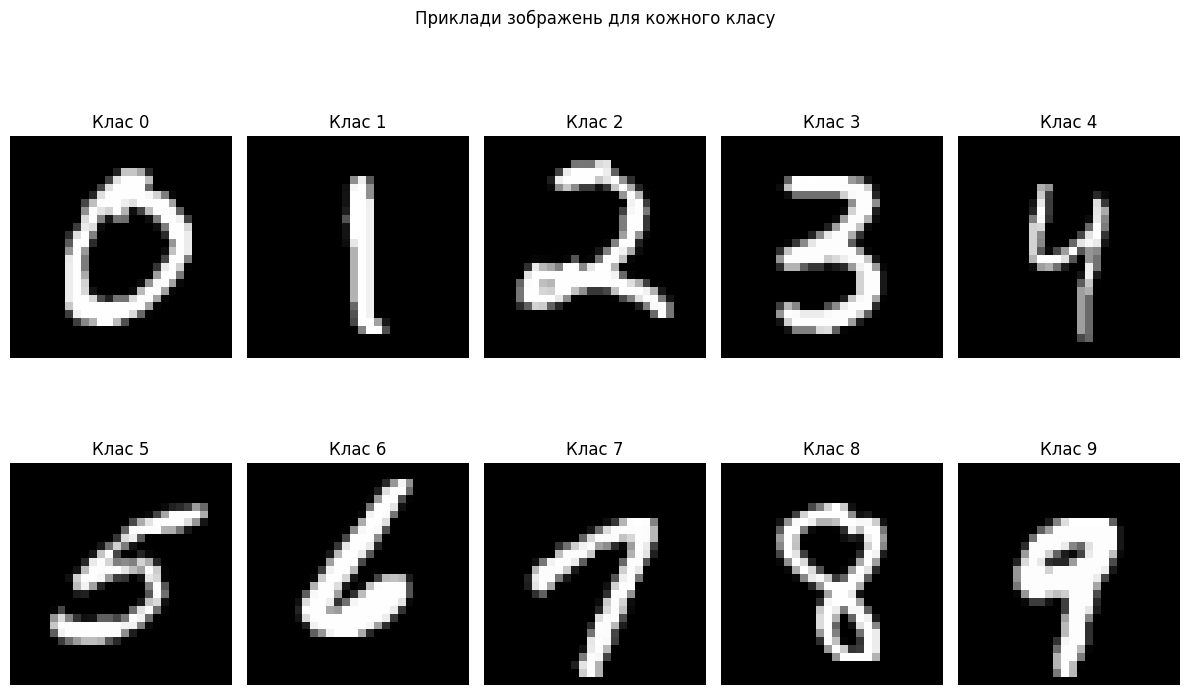

In [3]:
# Візуалізація прикладів зображень
num_classes = 10
plt.figure(figsize=(12, 8))
for i in range(num_classes):
    indices = np.where(y_data == i)[0]
    sample_index = np.random.choice(indices)
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_data[sample_index].reshape(28, 28), cmap='gray')
    plt.title(f"Клас {i}")
    plt.axis('off')
plt.suptitle("Приклади зображень для кожного класу")
plt.tight_layout()
plt.show()

In [4]:

# === Блок 2: Функції для створення моделей ===

def simple_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def medium_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def complex_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# === Блок 3: Крос-валідація для моделей ===

models = [simple_model, medium_model, complex_model]
model_names = ['Проста модель', 'Середня модель', 'Складна модель']

kf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for model_fn, model_name in zip(models, model_names):
    print(f"\nРезультати для {model_name}:\n")
    precisions, recalls, f1s, accuracies = [], [], [], []

    for train_index, test_index in kf.split(x_data, y_data):
        x_train, x_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]

        model = model_fn()
        model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=0)

        y_pred = model.predict(x_test).argmax(axis=1)

        # Обчислення метрик
        precisions.append(precision_score(y_test, y_pred, average='macro'))
        recalls.append(recall_score(y_test, y_pred, average='macro'))
        f1s.append(f1_score(y_test, y_pred, average='macro'))
        accuracies.append(accuracy_score(y_test, y_pred))

    # Виведення середніх значень метрик
    print(f"Precision: {np.mean(precisions):.4f}")
    print(f"Recall: {np.mean(recalls):.4f}")
    print(f"F1-score: {np.mean(f1s):.4f}")
    print(f"Accuracy: {np.mean(accuracies):.4f}")


plt.show()


Результати для Проста модель:



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision: 0.8973
Recall: 0.8968
F1-score: 0.8968
Accuracy: 0.8982

Результати для Середня модель:



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


730/730 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Precision: 0.9730
Recall: 0.9729
F1-score: 0.9729
Accuracy: 0.9731

Результати для Складна модель:



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


730/730 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


730/730 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


730/730 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Precision: 0.9843
Recall: 0.9841
F1-score: 0.9842
Accuracy: 0.9842


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.8998 - loss: 0.3335 - val_accuracy: 0.9810 - val_loss: 0.0654
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.9827 - loss: 0.0586 - val_accuracy: 0.9834 - val_loss: 0.0543
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9856 - val_loss: 0.0509
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.9939 - loss: 0.0213 - val_accuracy: 0.9865 - val_loss: 0.0471
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9811 - val_loss: 0.0677
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.9966 - loss: 0.0102 - val_accuracy: 0.9847 - val_loss: 0.0602
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9841 - val_loss: 0.0630
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.9978 -

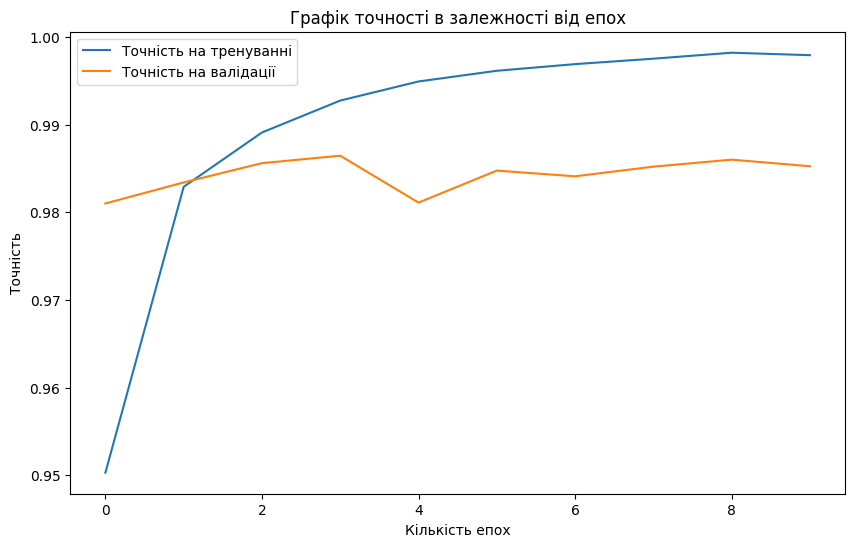

In [6]:
# === Блок 4: Графік точності для CNN ===

# Тренування складної моделі
x_train, x_val = x_data[:50000], x_data[50000:]
y_train, y_val = y_data[:50000], y_data[50000:]

cnn_model = complex_model()
history = cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Візуалізація точності
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Точність на тренуванні')
plt.plot(history.history['val_accuracy'], label='Точність на валідації')
plt.title('Графік точності в залежності від епох')
plt.xlabel('Кількість епох')
plt.ylabel('Точність')
plt.legend()